In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data=pd.read_csv("Swiggy data.csv")
data.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [5]:
data.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [6]:
#finding the shape
data.shape

(118, 5)

In [7]:
#finding the rows and column
print("The number of rows:",data.shape[0])
print("The number of coloumn:",data.shape[1])

The number of rows: 118
The number of coloumn: 5


In [8]:
data.isnull()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
113,False,False,False,False,False
114,False,False,False,False,False
115,False,False,False,False,False
116,False,False,False,False,False


In [9]:
data.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [10]:
data['Cost_for_Two'].dtype

dtype('O')

In [11]:
data.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [12]:
#finding no.of duplicated rows
print("the number of duplicated rows",data.duplicated())


the number of duplicated rows 0      False
1      False
2      False
3      False
4      False
       ...  
113    False
114    False
115    False
116    False
117    False
Length: 118, dtype: bool


In [13]:
#unique values
data.nunique()

Shop_Name       115
Cuisine          79
Location         65
Rating           13
Cost_for_Two     30
dtype: int64

In [14]:
#Removing the rupees symbol from column to analyze rate
def data_preprocessing(str):
  cost=str.split(' ')[1]
  return cost


In [15]:
data['Cost_for_Two']=data['Cost_for_Two'].apply(data_preprocessing)

In [16]:
data['Cost_for_Two']

0      150
1      400
2      126
3      400
4      450
      ... 
113    219
114    600
115    193
116    200
117    400
Name: Cost_for_Two, Length: 118, dtype: object

In [17]:
#converting rate to int
data['Cost_for_Two']=data['Cost_for_Two'].astype('int')

In [18]:
data['Cost_for_Two']

0      150
1      400
2      126
3      400
4      450
      ... 
113    219
114    600
115    193
116    200
117    400
Name: Cost_for_Two, Length: 118, dtype: int64

In [19]:
#sorting the data in the decreasing order of cost
data.sort_values(by='Cost_for_Two',ascending=False).head()


,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
73,Punjabi Rasoi,North Indian,"Sector 3, HSR",4,800
99,Dindigul Thalapakatti Biriyani,North Indian,"HSR, HSR",4.1,650
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
34,Taco Bell,Mexican,"6th Block, Koramangala",4.3,600
46,Pizza Hut,"Pizzas, Fast Food","Hosur Main Road, Koramangala",4,600


In [20]:
#sorting the data in the decreasing order of rating
data.sort_values(by='Rating',ascending=False).head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
78,Khichdi Experiment,"Home Food, Healthy Food, Indian","Koramangala, Koramangala",4.8,200
94,Corner House Ice Cream,"Ice Cream, Desserts","7th Block, Koramangala",4.6,250
82,Natural Ice Cream,Ice Cream,"Near Wipro Park Signal, Koramangala",4.6,150
80,Chinese Bae,"Chinese, Thai","BTM, BTM",4.5,450
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400


In [21]:
x=data.groupby('Rating')['Shop_Name'].count()


In [22]:
x.sort_values(ascending=False)

Rating
4.1    30
4.3    23
4      21
3.9    13
4.2    10
3.7     6
3.8     4
4.4     4
3.6     2
4.6     2
--      1
4.5     1
4.8     1
Name: Shop_Name, dtype: int64

In [23]:
data.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [24]:
# Define the cuisine you want to count
target_cuisine = "Italian"
cuisine_mask = data['Cuisine'].str.contains(target_cuisine, case=False)
filtered_data = data[cuisine_mask]
num_shops_offering_cuisine = len(filtered_data)
print(f"Number of shops offering {target_cuisine}: {num_shops_offering_cuisine}")

Number of shops offering Italian: 5


In [25]:
#details Of Italian cuisines
filtered_data

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
50,Onesta,"Italian, Desserts, Pizzas","4th Cross, Koramangala",3.7,250
52,FreshMenu,"Chinese, Continental, Italian, Mediterranean, ...","1st Block, Koramangala",3.9,350
97,La Pino'z Pizza,Italian,"4th Block, Koramangala",3.9,251


In [26]:
#locations where North_Indian cuisine is available
target_cuisine = "North Indian"
cuisine_mask = data['Cuisine'].str.contains(target_cuisine, case=False)
filtered_data = data[cuisine_mask]
location = filtered_data["Location"]
location

1                            Sector 5, HSR
2                   6th Block, Koramangala
3                                 HSR, HSR
5      Koramangala 4th  Block, Koramangala
6                       BTM 2nd Stage, BTM
8                                 HSR, HSR
10                    outer ring road, BTM
14                  7th Block, Koramangala
17                       Bommanahalli, BTM
18                  6th block, Koramangala
21           Jakkasandra Extn, Koramangala
22              Marutinagar Main Road, BTM
24                                HSR, HSR
26                  6th Block, Koramangala
29                Koramangala, Koramangala
31                      BTM 2nd stage, BTM
35                           3rd main, BTM
36                     HSR 1st sector, HSR
37                           Sector 7, HSR
38                  5th Block, Koramangala
42          16th Main Road, 2nd Stage, BTM
49                        Mico Layout, BTM
52                  1st Block, Koramangala
55         

In [27]:
locations = []
def dis():
  for i in data.Location:
    locations.append(i.split(",")[-1])
  return locations
Location = set(dis())
print("locations where North Indian cuisine is available",Location)

locations where North Indian cuisine is available {' Koramangala', ' Jayanagar', ' BTM', ' HSR'}


In [28]:
data_koramangala = data[data['Location'].str.contains(r'Koramangala')]
data_koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [29]:
data.shape

(118, 5)

In [30]:
print("The Number of Rows in Koramangala :", data_koramangala.shape[0])
print("The Number of Columns in Koramangala: ", data_koramangala.shape[1])

The Number of Rows in Koramangala : 64
The Number of Columns in Koramangala:  5


In [31]:
data_BTM = data[data['Location'].str.contains(r'BTM')]
data_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


In [32]:
print("The Number of Rows in BTM :", data_BTM.shape[0])
print("The Number of Columns in BTM: ", data_BTM.shape[1])

The Number of Rows in BTM : 35
The Number of Columns in BTM:  5


In [33]:
import seaborn as sns

[Text(0, 0.5, 'No.of Shops'), Text(0.5, 1.0, 'hist plot')]

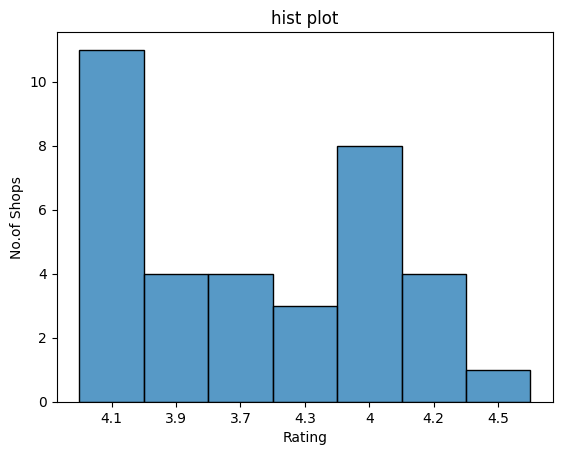

In [34]:
plot=sns.histplot(data_BTM['Rating'],bins=10)


# add label to the axis and label to the plot
plot.set( ylabel = "No.of Shops", title ='hist plot')


In [35]:
data.head(

)

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [36]:
csv_file_path = 'modified_data.csv'

# Save the DataFrame as a CSV file
data.to_csv(csv_file_path, index=False)

In [37]:
# from google.colab import files

# # Generate a download link for the CSV file
# files.download(csv_file_path)

In [38]:
data

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


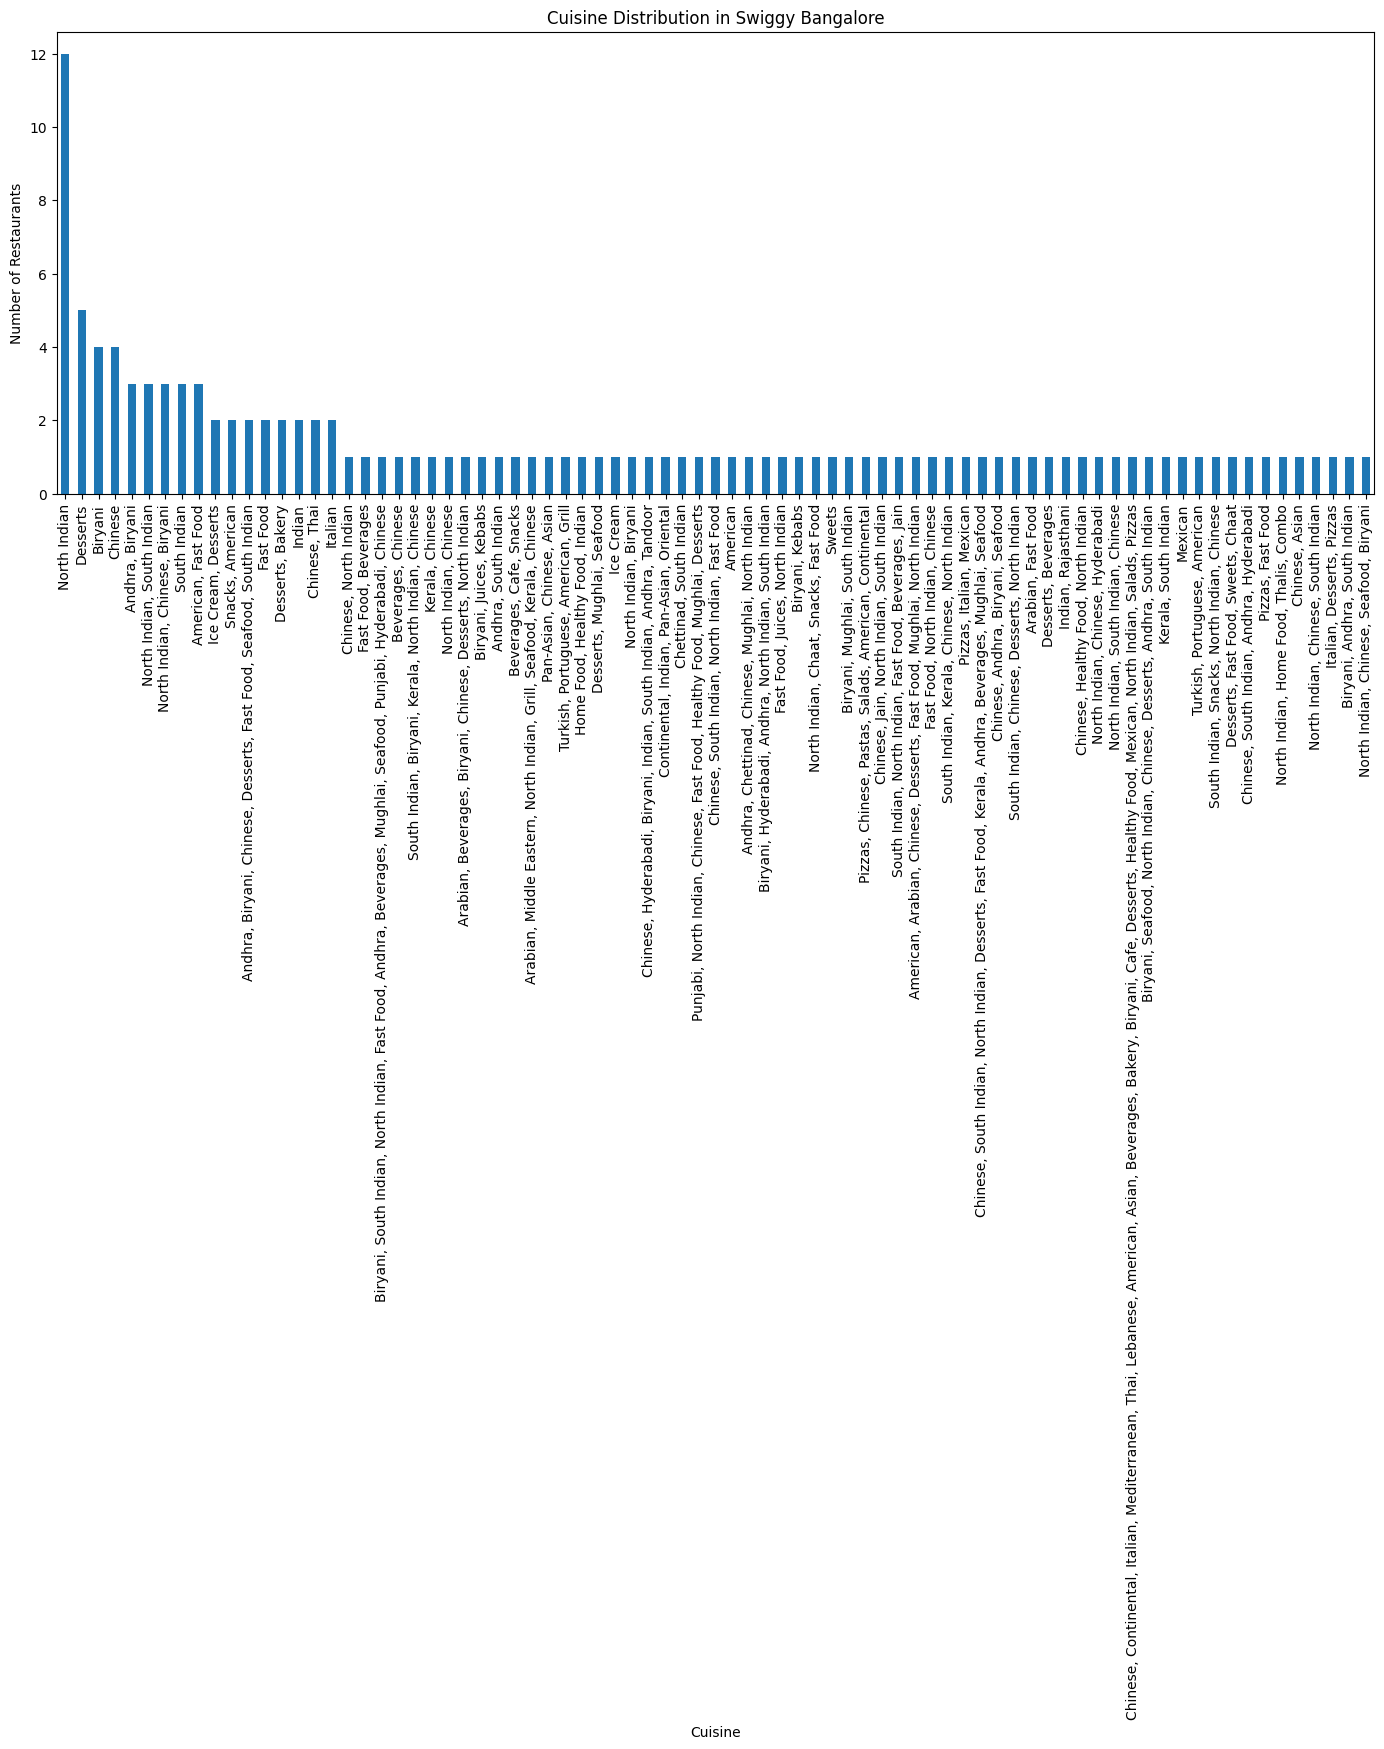

In [39]:
#Bar Charts

# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# You can use value_counts() to count the occurrences of each cuisine
cuisine_counts = data['Cuisine'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(17, 6))  # Adjust the figure size as needed
cuisine_counts.plot(kind='bar')
plt.title('Cuisine Distribution in Swiggy Bangalore')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off

plt.show()


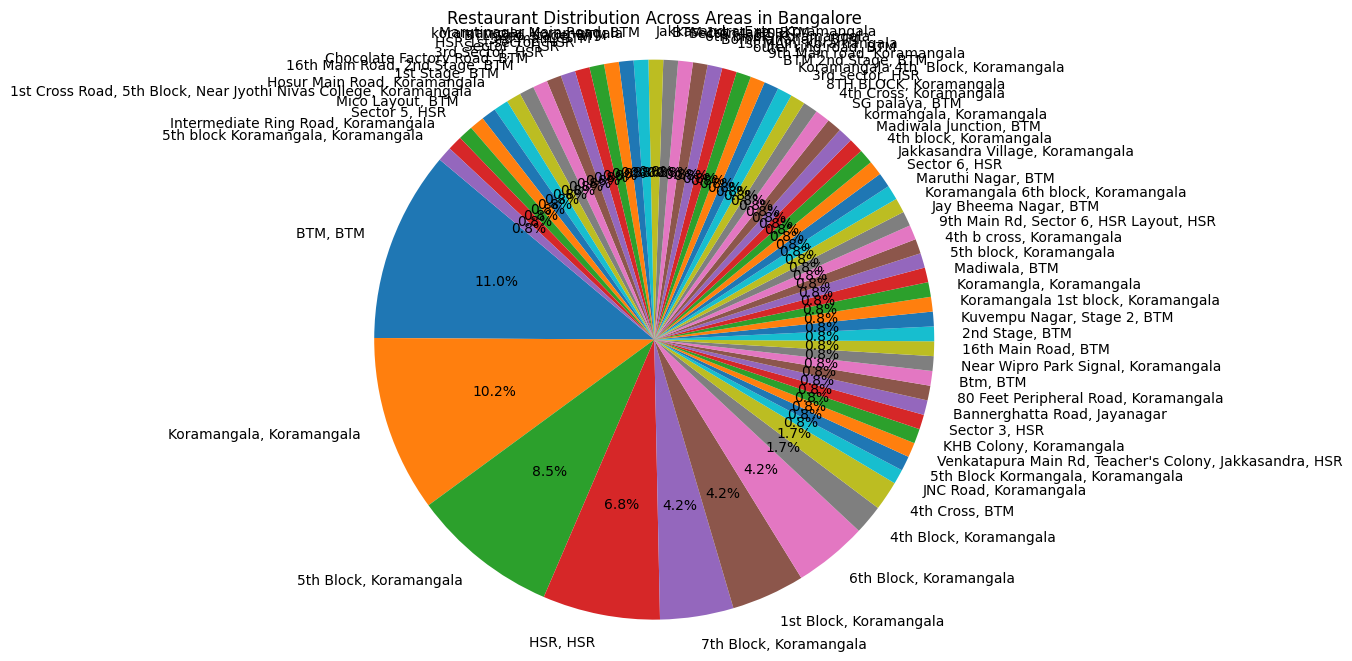

In [40]:


# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you have a 'Location' column containing the areas/neighborhoods

# Count the number of restaurants in each area
location_counts = data['Location'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Restaurant Distribution Across Areas in Bangalore')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


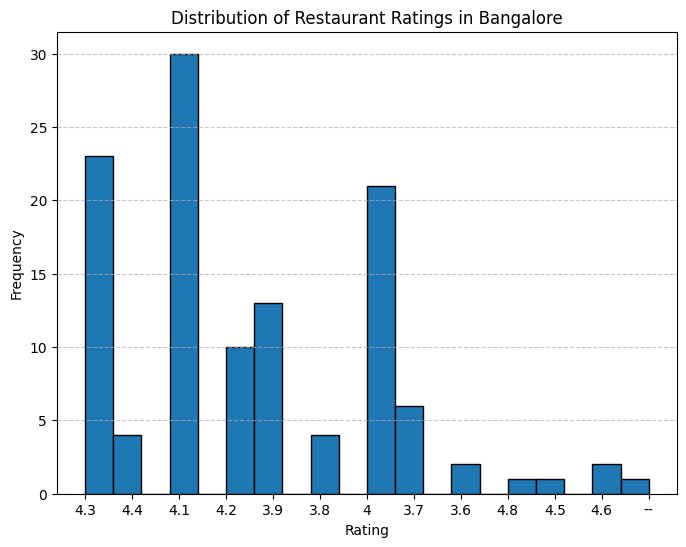

In [41]:



# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you have a 'Rating' column containing restaurant ratings

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20, edgecolor='k')
plt.title('Distribution of Restaurant Ratings in Bangalore')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [42]:
!pip install wordcloud


In [43]:
from wordcloud import WordCloud

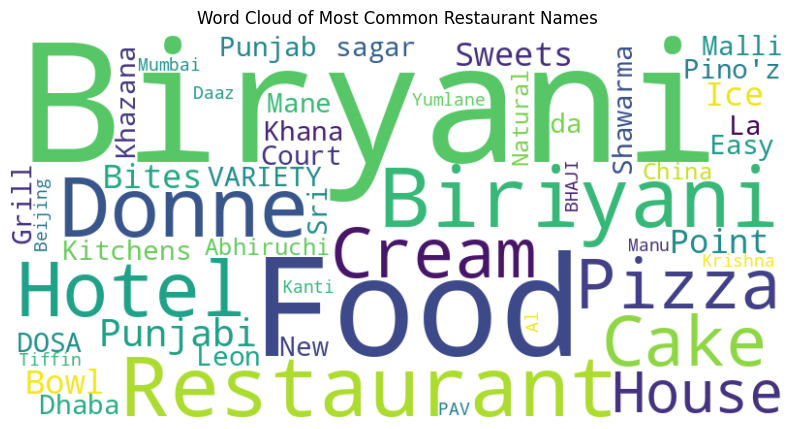

In [44]:
# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you have a 'Shop_Name' column containing restaurant names

# Combine all restaurant names into a single string
restaurant_names = ' '.join(data['Shop_Name'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(restaurant_names)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Common Restaurant Names')
plt.axis('off')  # Turn off axis labels
plt.show()


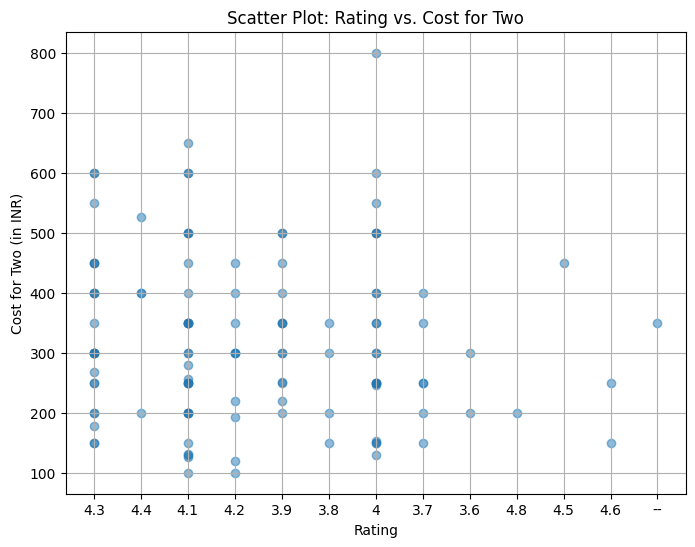

In [45]:


# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you have 'Rating' and 'Cost_for_Two' columns

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Rating'], data['Cost_for_Two'], alpha=0.5)
plt.title('Scatter Plot: Rating vs. Cost for Two')
plt.xlabel('Rating')
plt.ylabel('Cost for Two (in INR)')

plt.grid(True)

plt.show()


In [46]:


# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'

# Step 1: Inspect the data
print(data['Rating'].unique())

# Step 2: Data Cleaning and Conversion
def clean_and_convert_rating(rating_str):
    try:
        # Remove non-numeric characters and convert to float
        rating_str = rating_str.replace('%', '').replace('out of 5', '').strip()
        return float(rating_str)
    except ValueError:
        # Handle non-convertible values (e.g., 'NEW' or other text)
        return None

# Apply the cleaning and conversion function to the 'Rating' column
data['Rating'] = data['Rating'].apply(clean_and_convert_rating)

# Verify the data type conversion
print(data['Rating'].dtypes)

# Now, 'Rating' column should be of type float


['4.3' '4.4' '4.1' '4.2' '3.9' '3.8' '4' '3.7' '3.6' '4.8' '4.5' '4.6'
 '--']
float64


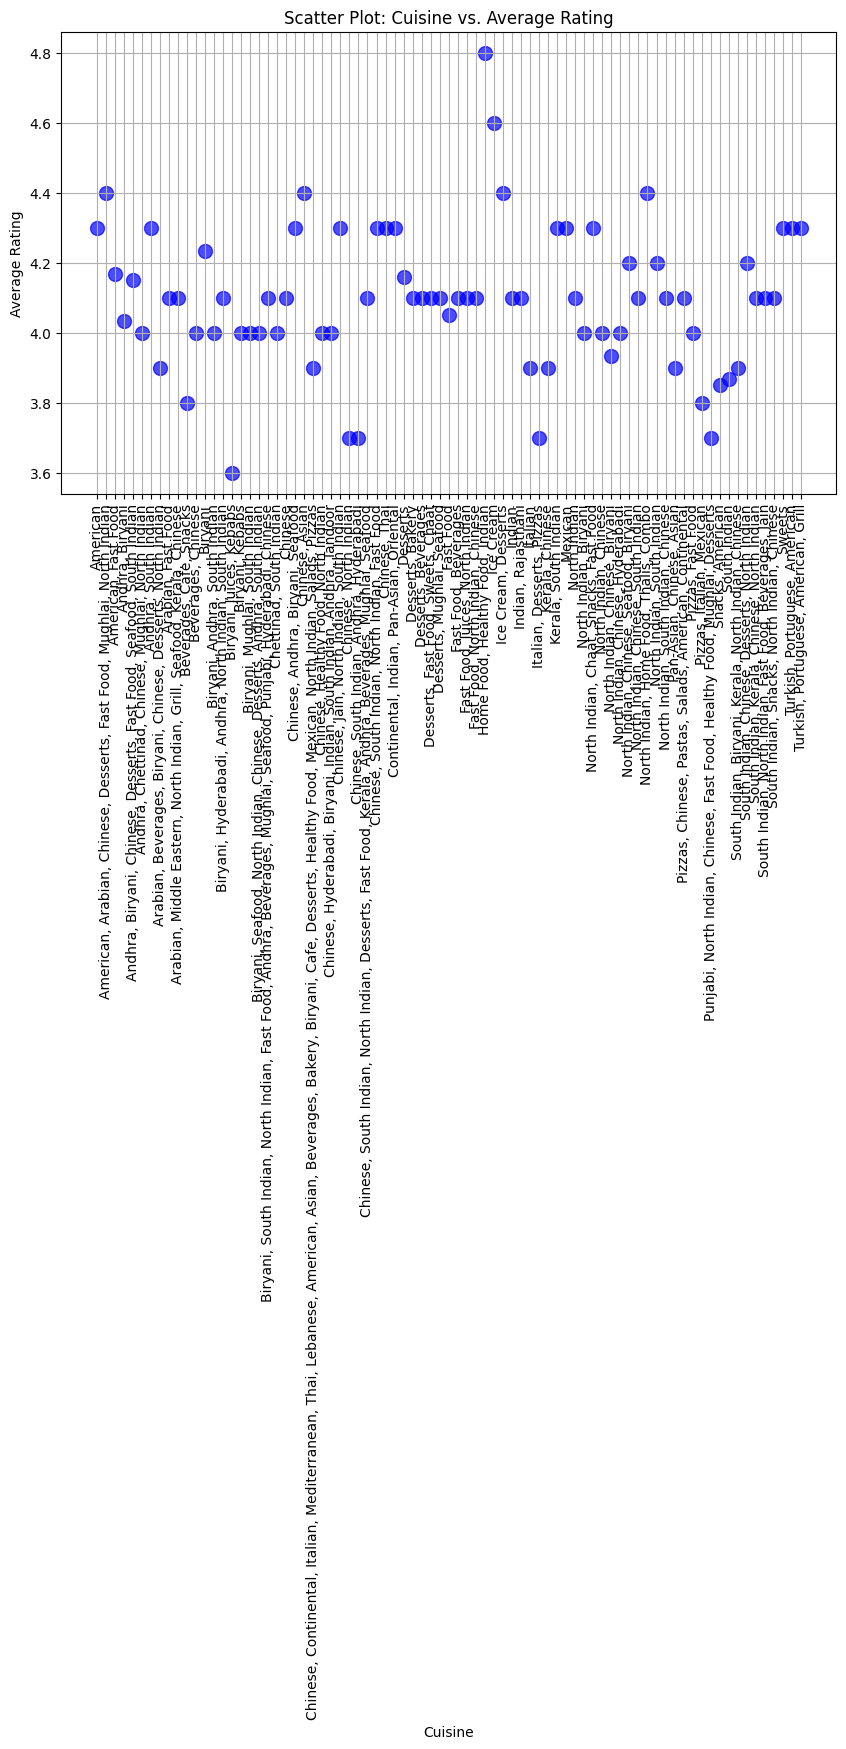

In [47]:
# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you have 'Cuisine' and 'Rating' columns

# Group the data by cuisine and calculate the mean rating
cuisine_ratings = data.groupby('Cuisine')['Rating'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cuisine_ratings['Cuisine'], cuisine_ratings['Rating'], s=100, c='b', alpha=0.7)
plt.title('Scatter Plot: Cuisine vs. Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.grid(True)

plt.show()


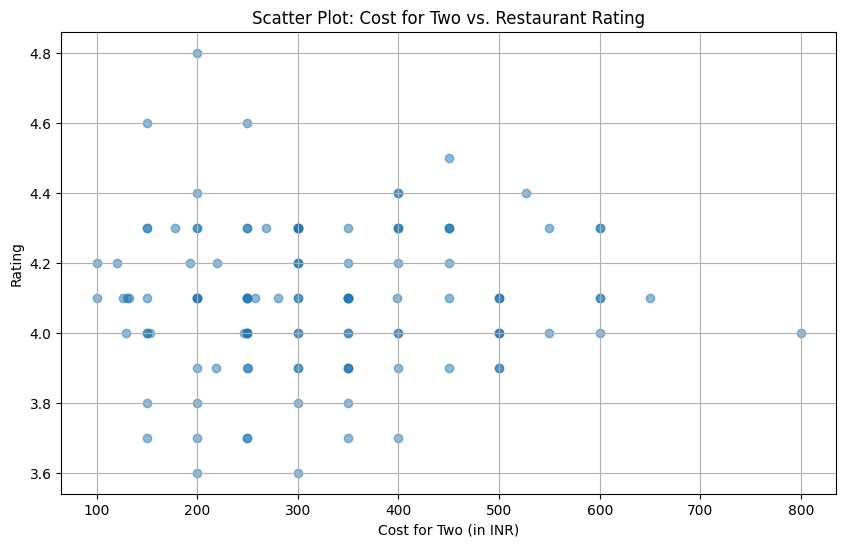

In [48]:


# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you have 'Rating' and 'Cost_for_Two' columns

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Cost_for_Two'], data['Rating'], alpha=0.5)
plt.title('Scatter Plot: Cost for Two vs. Restaurant Rating')
plt.xlabel('Cost for Two (in INR)')
plt.ylabel('Rating')
plt.grid(True)

plt.show()


In [49]:
# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you want to analyze the correlation between 'Rating' and 'Cost_for_Two'

# Select the numerical columns for correlation analysis
numerical_columns = ['Rating', 'Cost_for_Two']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()


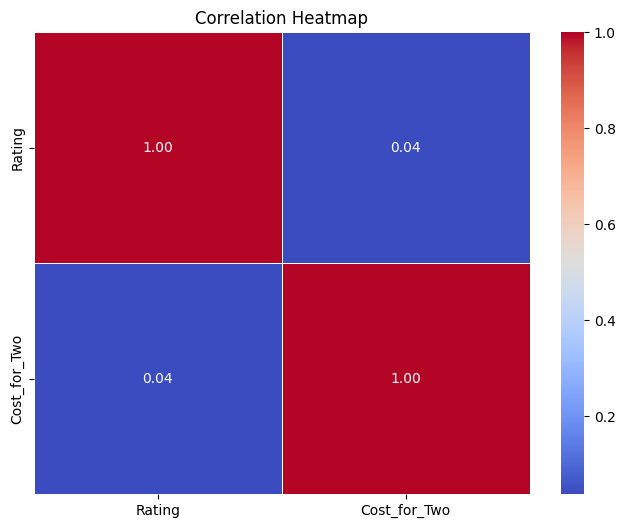

In [50]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


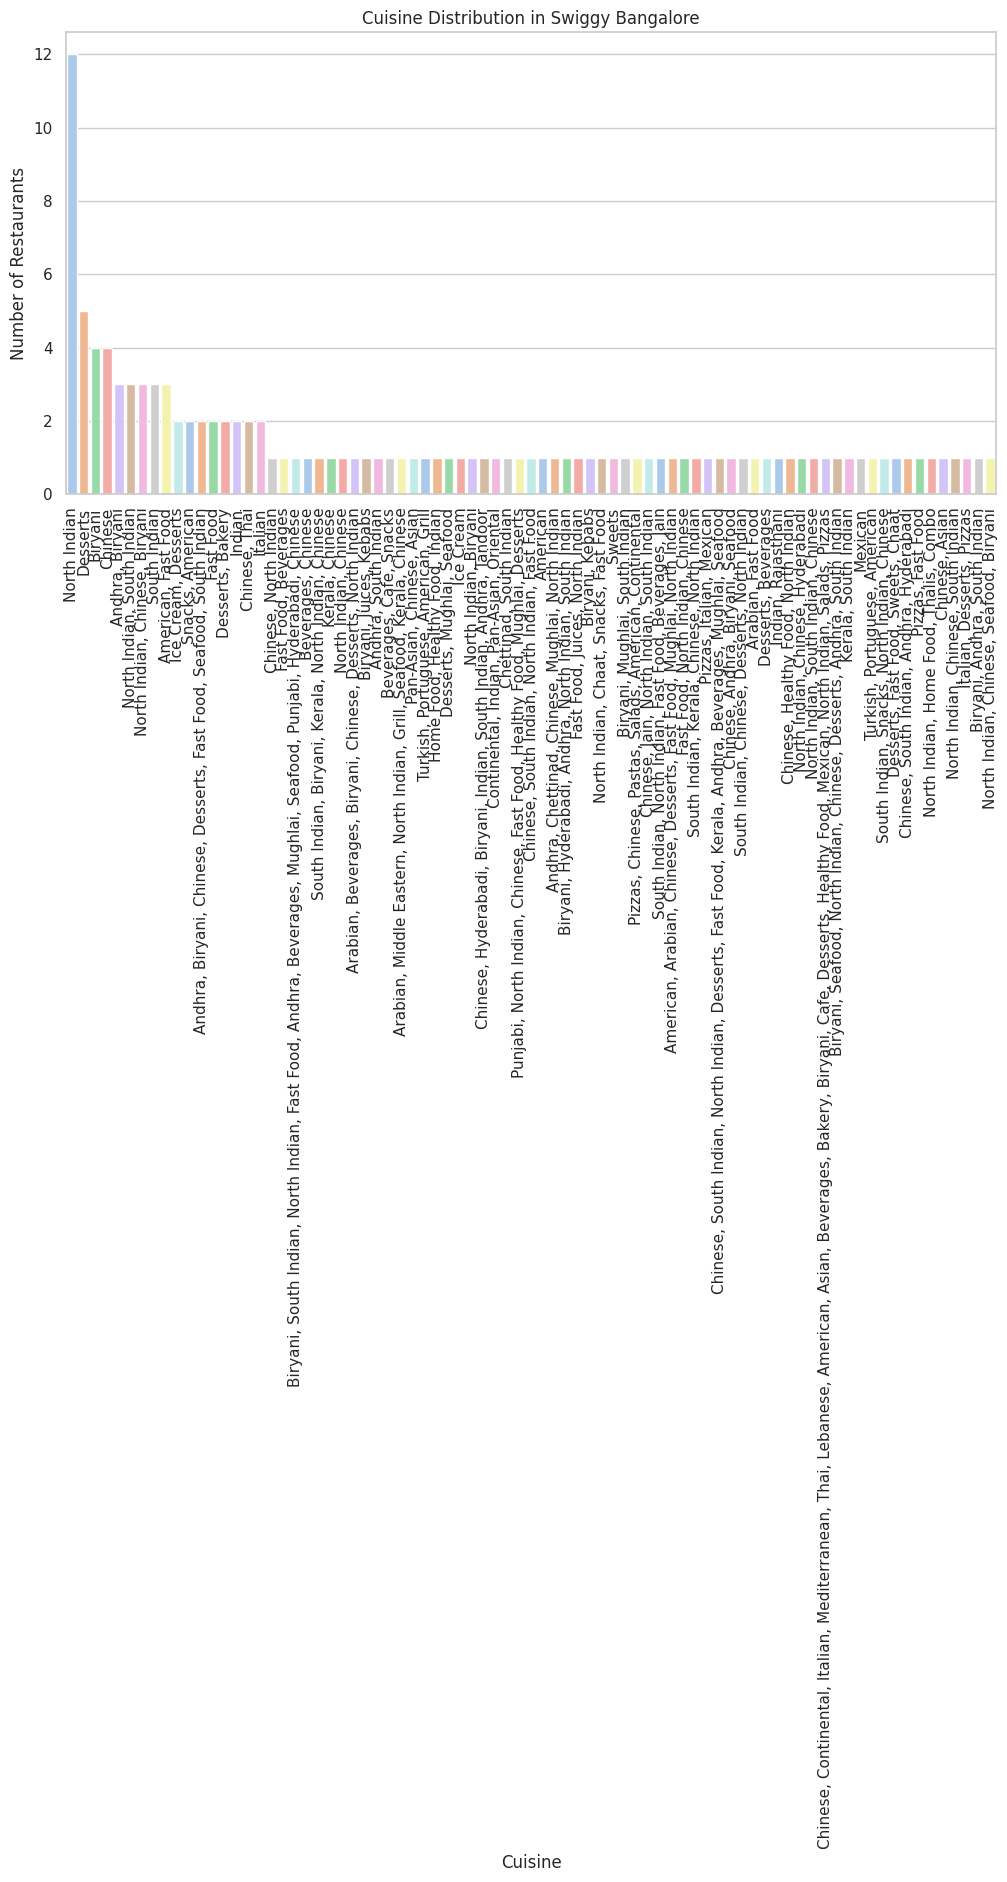

In [51]:

cuisine_counts = data['Cuisine'].value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']
# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you want to create a bar plot of cuisine distribution

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='Cuisine', y='Count', data=cuisine_counts, palette='pastel')
plt.title('Cuisine Distribution in Swiggy Bangalore')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


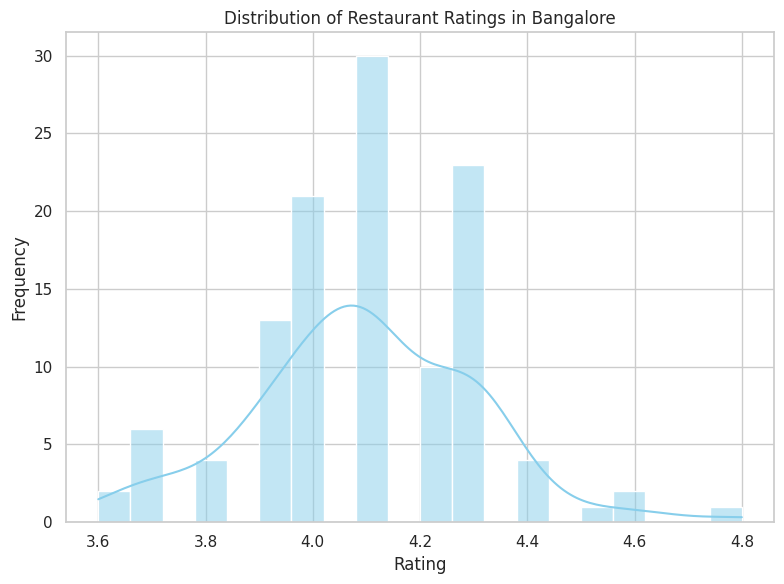

In [52]:


# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you want to create a histogram for restaurant ratings

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings in Bangalore')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [53]:
locations = []
def dis():
  for i in data.Location:
    locations.append(i.split(",")[-1])
  return locations
Location1 = dis()
Location1

[' Koramangala',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' HSR',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' BTM',
 ' HSR',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' HSR',
 ' HSR',
 ' Koramangala',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' Koramangala',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' Koramangala',
 ' BTM',
 ' BTM',
 ' BTM',
 ' HSR',
 ' Koramangala',
 ' HSR',
 ' Jayanagar',
 ' Koramangala',
 ' BTM

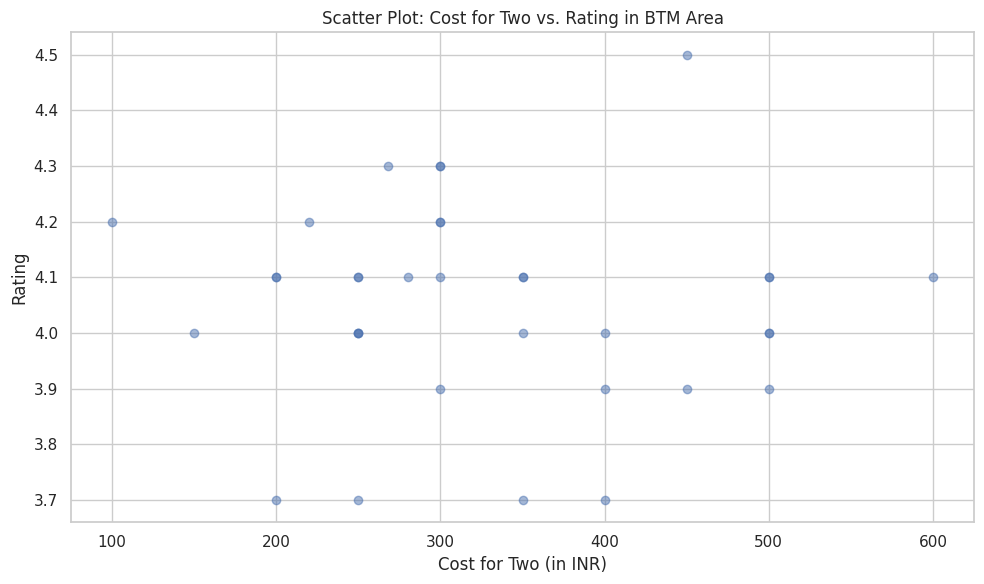

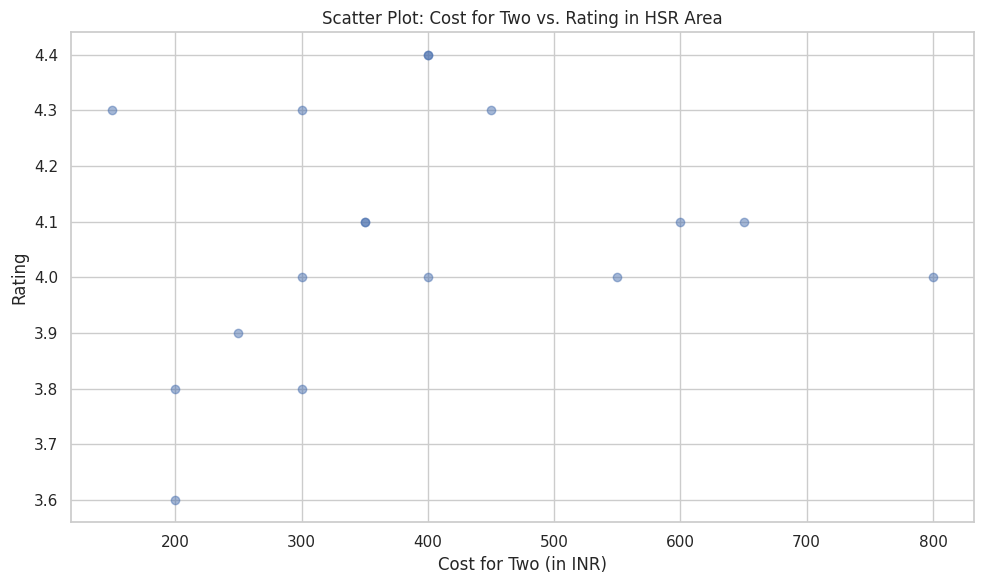

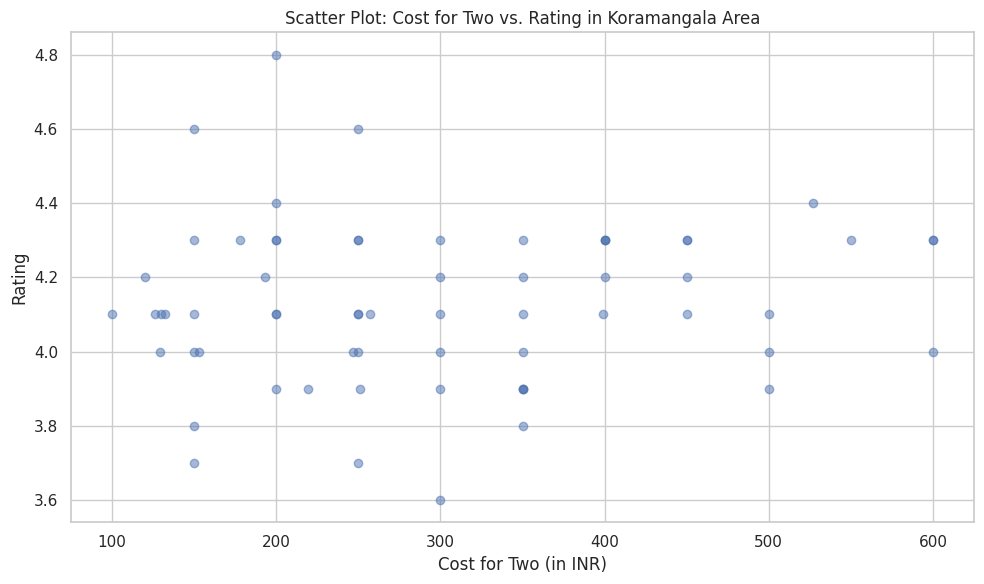

In [54]:

# Assuming you have loaded your Swiggy dataset into a DataFrame named 'data'
# Assuming you have 'Location', 'Cost_for_Two', and 'Rating' columns

# Define the location substrings of interest
selected_location_substrings = ['BTM', 'HSR', 'Koramangala']

# Loop through the selected location substrings and create scatter plots
for location_substring in selected_location_substrings:
    location_data = data[data['Location'].str.contains(location_substring, case=False, na=False)]

    if not location_data.empty:
        plt.figure(figsize=(10, 6))
        plt.scatter(location_data['Cost_for_Two'], location_data['Rating'], alpha=0.5)
        plt.title(f'Scatter Plot: Cost for Two vs. Rating in {location_substring} Area')
        plt.xlabel('Cost for Two (in INR)')
        plt.ylabel('Rating')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for {location_substring} Area")
